In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None) # will show all the columns in dataframe

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes # by observing we found that total charges is object type which it should not be..it should be float

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.drop('customerID',axis='columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.TotalCharges.values # so the reason of object is becoz of string nature in between

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**so i tried to convert it to numeric value by using pd.to_numeric(df.TotalCharges) but it is giving the error so there might be some missing values which is giving the error**

In [8]:
df.TotalCharges.isna()  # so i tried to see it is there any nan value but didn't able to see

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]  #pandas documentation

# we can not apply directly pd to numeric so we first we need to check why?

## Using errors=’coerce’. It will replace all non-numeric values with NaN

# this dataframe will show that row of total charges which have nonnumeric value

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[df.TotalCharges==' '].shape[0]  # so total 11 non numeric values are present here

11

In [11]:
df1 = df[df.TotalCharges!=' ']  # because it is very less compare to the whole thousand data so we can remove it
df1.head()   # so we have created the dataframe by removing those 11 nan values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df1.shape # so now reduced from 7043 to 7032

(7032, 20)

In [13]:
df1.TotalCharges.dtypes

dtype('O')

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [15]:
df1.dtypes # so now total charges it has converted to float sucessfully

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df1[df1.Churn=='Yes']   #give the dataframe with customer leaving

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


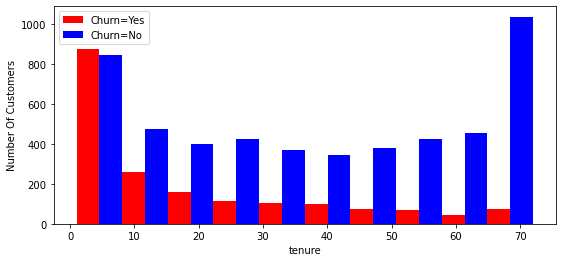

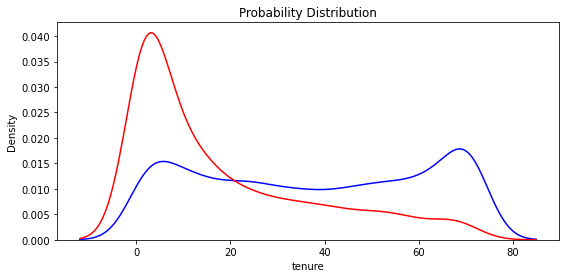

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

tenure_cy = df1[df1.Churn=='Yes'].tenure
tenure_cn = df1[df1.Churn=='No'].tenure

plt.figure(figsize=(9, 4))
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.hist([tenure_cy, tenure_cn], rwidth=2, color=['red','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

plt.figure(figsize=(9, 4))
plt.title("Probability Distribution")
ax0 = sns.kdeplot(tenure_cn, color= 'blue', label= 'Churn: No')
ax1 = sns.kdeplot(tenure_cy, color= 'red', label= 'Churn: Yes')


# so by seeing bar churn=no has high bar at high teneure compare to churn=yes
# thats why the dataframe is showing that the one with high teneure is not churning(still vey large no. customer present)

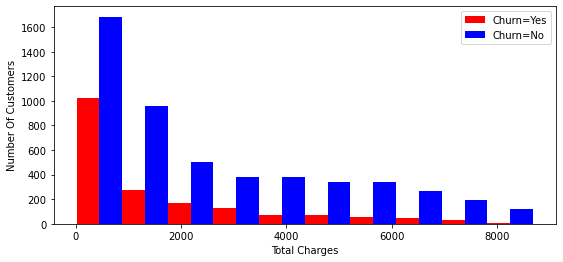

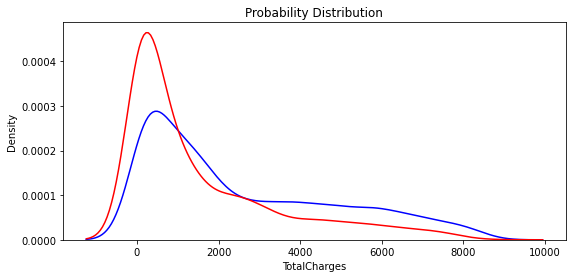

In [18]:
TotalCharges_cy = df1[df1.Churn=='Yes'].TotalCharges
TotalCharges_cn = df1[df1.Churn=='No'].TotalCharges      
      
plt.figure(figsize=(9, 4))
plt.xlabel("Total Charges")
plt.ylabel("Number Of Customers")
plt.hist([TotalCharges_cy, TotalCharges_cn], rwidth=2, color=['red','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

plt.figure(figsize=(9, 4))
plt.title("Probability Distribution")
ax_tc0 = sns.kdeplot(TotalCharges_cn, color= 'blue', label= 'Churn: No')
ax_tc1 = sns.kdeplot(TotalCharges_cy, color= 'red', label= 'Churn: Yes')

# we can not make any conclusion here becoz both plots are same kind of type

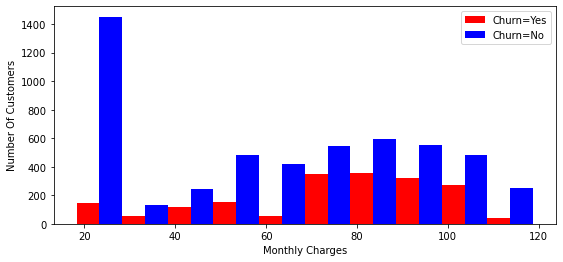

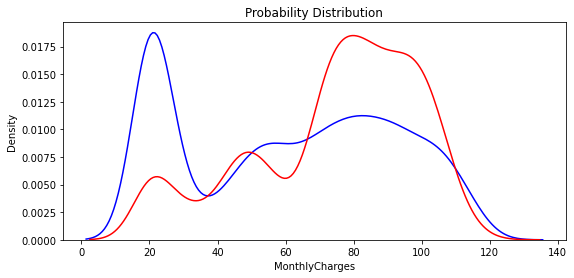

In [19]:
MonthlyCharges_cy = df1[df1.Churn=='Yes'].MonthlyCharges
MonthlyCharges_cn = df1[df1.Churn=='No'].MonthlyCharges      
      
plt.figure(figsize=(9, 4))
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.hist([MonthlyCharges_cy, MonthlyCharges_cn], rwidth=2, color=['red','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

plt.figure(figsize=(9, 4))
plt.title("Probability Distribution")
ax_m0 = sns.kdeplot(MonthlyCharges_cn, color= 'blue', label= 'Churn: No')
ax_m1 = sns.kdeplot(MonthlyCharges_cy, color= 'red', label= 'Churn: Yes')

# so we can say the customers who have high monthly charges are leaving more thats why at the end blue bar has less no.

# 
From the plots above we can conclude that:

Tenure and MonthlyCharges are probably important features.

In [20]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
def barplot(feature):
    d = df1.groupby(feature)["Churn"].value_counts().to_frame()   # pandas documentation
    d = d.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
    d["percentage of customers"] = (d["percentage of customers"]/len(df1))*100  #creating a new column and concat to dataframe
    e = sns.barplot(x=feature, y= "percentage of customers", hue='Churn', data=d) 
    e.plot()
    

#s = pd.Series(["a", "b", "c"],name="vals")
#s.to_frame()
#vals
#0    a
#1    b
#2    c


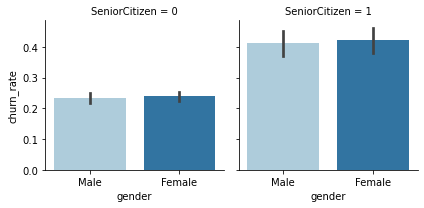

In [22]:
df1['churn_rate'] = df1['Churn'].replace("No", 0).replace("Yes", 1) # mapping and concat in dataframe
d = sns.FacetGrid(df1, col="SeniorCitizen")  # will create two plot column of senior or not
d.map(sns.barplot, "gender", "churn_rate", palette = "Paired", order= ['Male','Female']) # now compare gender wise with age

# so ging into more deep we got that gender is not a concern for churn
#only the point we can conclude that senior citizen have very high churn rate you can see

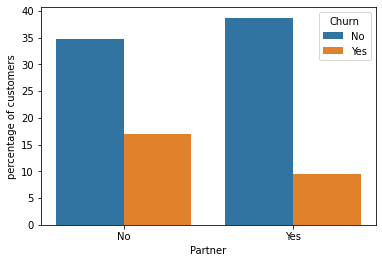

In [23]:
barplot("Partner")
# less churn who has partner compare to who dont have

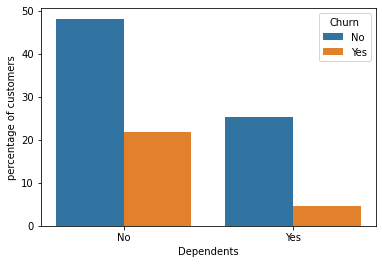

In [24]:
barplot("Dependents")
#who are dependents has very less churning rate compare to not dependent

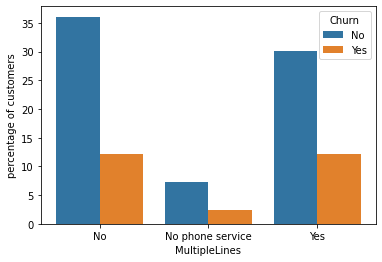

In [25]:
barplot("MultipleLines")
# who has multiple lines has high churn rate

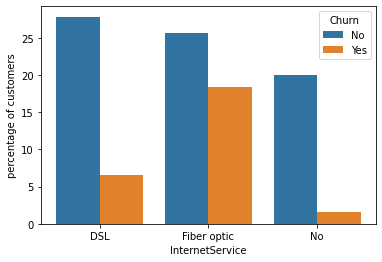

In [26]:
barplot("InternetService")
# with Fiber optic internet service has high rate of churn

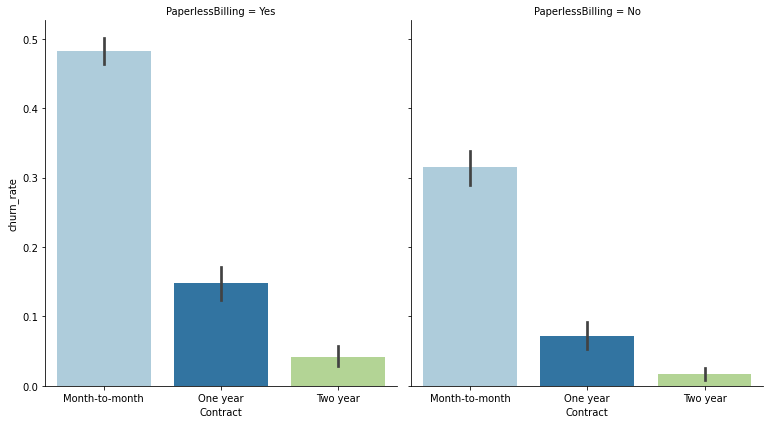

In [27]:
e1 = sns.FacetGrid(df1, col="PaperlessBilling", height=6, aspect=.9)
e1.map(sns.barplot, "Contract", "churn_rate", palette = "Paired", order= ['Month-to-month', 'One year', 'Two year'])

#Customers with paperless billing are more probable to churn. 

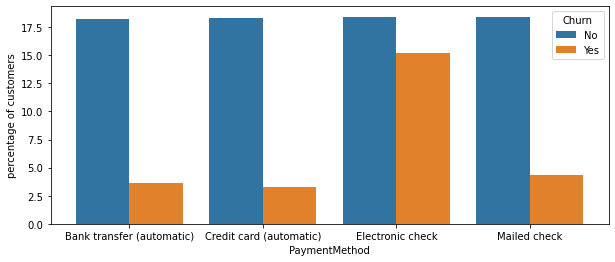

In [28]:
plt.figure(figsize=(10, 4))
barplot('PaymentMethod')
# now if we go deep into the payment methods we found that customers which have electronic check are more likely to churn

<h2 style="color:blue;">Data Cleaning</h2>

In [29]:
#Many of the columns are yes, no etc. so we print unique values in object columns to see data values
def unique_column_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print("{}: {}".format(column,df[column].unique()))
unique_column_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [30]:
#Some of the columns have no internet service or no phone service, that can be replaced with a simple No for easyness
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
unique_column_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
yes_no_to_1_0 = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_to_1_0:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)
    
for col in df1:
    print("{}: {}".format(col,df1[col].unique()))
    
    
# becoz machine learning only understand numbers not text

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
churn_rate: [0 1]


In [32]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace=True)

In [33]:
df1.drop('churn_rate',axis='columns',inplace = True)

In [34]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [35]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [36]:
df2.dtypes # so all datatype are numeric

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [37]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [39]:
print("X_train shape is: {}".format(X_train.shape))
print("X_test shape is: {}".format(X_test.shape))
print("Total column in X_train are: {}".format(len(X_train.columns)))

X_train shape is: (4922, 26)
X_test shape is: (2110, 26)
Total column in X_train are: 26


In [40]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1389,1,1,1,0,34,1,1,0,1,1,0,0,1,1,94.25,3217.55,0,1,0,1,0,0,0,0,1,0
5615,0,0,0,0,1,1,0,0,0,0,0,0,0,1,20.20,20.20,0,0,1,1,0,0,1,0,0,0
3015,0,0,1,1,59,1,0,1,1,1,1,1,1,1,86.75,5186.00,1,0,0,0,0,1,0,0,1,0
444,1,0,1,0,36,1,0,0,0,0,0,0,1,0,80.40,2937.65,0,1,0,1,0,0,0,0,1,0
5817,0,0,0,1,1,1,0,0,0,0,0,0,0,1,44.40,44.40,1,0,0,1,0,0,0,0,1,0


In [41]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [70]:
import numpy as np
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),   # input_dim is column as we have calculated above 
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')              #26,15,1 depends on us that how much neuron do u want
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    
    model.fit(X_train, y_train, epochs=100)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [71]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7631
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7985
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8052: 0s - loss: 0.4309 - accuracy
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8048
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8076
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8070
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8086
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8096
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8090
Epoch 10/100
154/154 [==============================] - 0s 2m

so by observing the classification report F1 score for class 1 (who is leaving the business) is not high compare to class 0 so there is something by which we are not getting good F1 score both at the same time

In [72]:
y_test.value_counts() # so here is high diffrence b/w the 0 and 1 class data so its an imbalance datset

0    1511
1     599
Name: Churn, dtype: int64

<h3 style='color:blue'>SMOTE Technique to improve imbalance dataset</h3>

In [42]:
X_smote = df2.drop('Churn',axis='columns')
y_smote = df2['Churn']

In [43]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [47]:
# Number of classes in training Data
y_train_s.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [56]:
model1 = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),   # input_dim is column as we have calculated above 
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')                  #26,15,1 depends on us that how much neural do u want
    ])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    

model1.fit(X_train_s, y_train_s, epochs=100)

    
print(model1.evaluate(X_test_s, y_test_s))

Epoch 1/100
259/259 [==============================] - 0s 1ms/step - loss: 0.7811 - accuracy: 0.6858
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7136
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.7178
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7156
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6971
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7156
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6757
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7190
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7259
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5725 - accura

In [57]:
import numpy as np
y_preds21 = model1.predict(X_test_s)
y_preds31 = np.round(y_preds21)
print("Classification Report: \n", classification_report(y_test_s, y_preds31))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1033
           1       0.85      0.82      0.83      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



SMOTE Oversampling increases f1 score of minority class 1 from **0.55 to 0.83 (huge improvement)** Also over all accuracy improves from 0.76 to 0.84

<h3 style='color:blue'>Saving the model</h3>

In [59]:
from tensorflow.keras.models import load_model

model.save('model1.h5')

In [61]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))